[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_08-UnsupervisedLearning/blob/master/F08_SC1-Clustering_Sprint_Challenge.ipynb)

# Clustering Sprint Challenge

Objectives:
* Describe two clustering algorithms
* Create k clusters with k-Means algorithm
* Compare/contrast the performance of your two algorithms with two datasets

### 1. Describe two different clustering algorithms

There are many clustering algorithms with profoundly different implementations. Their objective is the same - to identify groups in unlabeled data.

Fill out the below python objects.

In [40]:
#!wget -c https://www.dropbox.com/s/zakq7e0r8n1tob9/clustering_set1.csv?raw=1 && mv clustering_set1.csv?raw=1 clustering_set1.csv && ls -lh clustering_set1.csv && date
#!wget -c https://www.dropbox.com/s/zakq7e0r8n1tob9/clustering_set2.csv?raw=1 && mv clustering_set2.csv?raw=1 clustering_set2.csv && ls -lh clustering_set2.csv && date
#!ls -lh *csv

In [41]:
# Clustering algorithm 1:

algorithm_one_name = "Expectation Maximization Clustering using Gaussian Mixture Models"
algorithm_one_description = '''
In constrast to the circular clustering we get with K-Means
Gaussian Mixture Models use a combination of standard deviation and Mean
because the mean and standard deviation can be mixed the cluster's shapes can
vary from circular to oval
'''

# Clustering algorithm 2:

algorithm_two_name = "Density-Based Spatial Clustering of Applications with Noise [DBSCAN] "
algorithm_two_description = '''
This algorithm uses a threshold e to determine the proximity of samples to each other. If there are a sufficient 
amount of points within a certain area the clustering commences. This allows for an arbirtrary amount of clusters 
and shapes but the algorithm can have difficulty if the  cluster vary sufficiently in density.
'''

### 2. Create k clusters with k-Means algorithm

In [42]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Dataset
set1 = pd.read_csv('clustering_set1.csv')

X = set1[['x','y']].values

# Create kmeans object
#this_many_classes = np.unique(set1.targets).shape[0]
km = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)

# Fit kmeans object to data
km.fit(set1)

# Print location of clusters learned by kmeans object
km.cluster_centers_ # Why does this have 3 coordinates? Is it a 3 dimensional cluster?

array([[ 2.08900000e+03,  4.83968316e-02,  3.93990493e+00],
       [ 2.95500000e+02,  3.93750915e-02, -3.99294428e+00],
       [ 1.48650000e+03, -6.28763424e-03, -1.71226095e-01],
       [ 2.69550000e+03,  8.15995283e-03,  4.03387589e+00],
       [ 8.89000000e+02,  7.71191506e-02, -4.02903134e+00]])

### 3. Compare/contrast the performance of your two algorithms with two datasets

In [43]:
# Second dataset
set2 = pd.read_csv('clustering_set2.csv')


In [44]:
X1 = X
X2 = set2[['x','y']].values

In [45]:
from sklearn import cluster, mixture

EMcGMM1 = mixture.GaussianMixture(n_components=1, covariance_type='full')
EMcGMM2 = mixture.GaussianMixture(n_components=1, covariance_type='full')
DBSCAN1 = cluster.DBSCAN(eps=0.5, min_samples=5)
DBSCAN2 = cluster.DBSCAN(eps=0.5, min_samples=5)

In [46]:
%%time
EMcGMM1.fit(X1)
EMcGMM2.fit(X2)
DBSCAN1.fit(X1)
DBSCAN2.fit(X2)

CPU times: user 132 ms, sys: 7.08 ms, total: 139 ms
Wall time: 197 ms


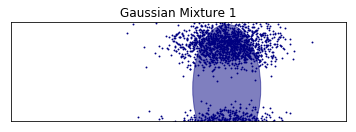

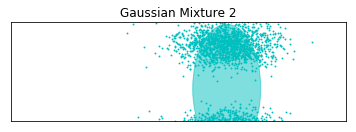

AttributeError: 'DBSCAN' object has no attribute 'predict'

In [54]:
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl


color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)



plot_results(X1, EMcGMM1.predict(X1), EMcGMM1.means_, EMcGMM1.covariances_, 1,
             'Gaussian Mixture 1')
plt.show()

plot_results(X2, EMcGMM2.predict(X2), EMcGMM2.means_, EMcGMM2.covariances_, 1,
             'Gaussian Mixture 2')
plt.show()


plot_results(X1, DBSCAN2.predict(X2), DBSCAN2.means_, DBSCAN2.covariances_, 1,
             'DBSCAN 2')
plt.show()



#EMcGMM1.cluster_centers_
#EMcGMM2.cluster_centers_
#DBSCAN1.cluster_centers_
#DBSCAN2.cluster_centers_


In [37]:
dir(EMcGMM1)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_initial_parameters',
 '_check_is_fitted',
 '_check_parameters',
 '_compute_lower_bound',
 '_e_step',
 '_estimate_log_prob',
 '_estimate_log_prob_resp',
 '_estimate_log_weights',
 '_estimate_weighted_log_prob',
 '_estimator_type',
 '_get_param_names',
 '_get_parameters',
 '_initialize',
 '_initialize_parameters',
 '_m_step',
 '_n_parameters',
 '_print_verbose_msg_init_beg',
 '_print_verbose_msg_init_end',
 '_print_verbose_msg_iter_end',
 '_set_parameters',
 'aic',
 'bic'

In [55]:
!git status && date


On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
Sun Jun  3 15:36:27 EDT 2018


In [38]:
!git add . && git commit -am "I got the Gaussian Mixtures to plot but they look exactly the same :( Are they actually the same data set?" && git status && git push && date && git status && date

[master 38f0303] working on part 3 I think it's time to plot the data for the (2 datasets * 2 clustering algorithms)
 1 file changed, 3001 insertions(+)
 create mode 100644 clustering_set2.csv
On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Counting objects: 2, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (2/2), 309 bytes | 309.00 KiB/s, done.
Total 2 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:schwaaweb/aimlds1_08-UnsupervisedLearning.git
   dab319c..38f0303  master -> master
Sat Jun  2 21:30:21 EDT 2018
On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
Sat Jun  2 21:30:21 EDT 2018
